In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import pandas as pd 

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Load the data set

df = pd.read_csv('C:/Users/rbsic/ml_project/data/COMMODITY_DATA.csv')  # Adjust this path as necessary

Current Working Directory: c:\Users\rbsic\ml_project\notebooks


In [4]:
# Check the first few rows of the dataset
print(df.head())

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display information about the dataset
print(df.info())

# Check for missing values
print("Missing values:\n", df.isnull().sum())


         date    WTI      COTTON  NATURAL_GAS  ALL_COMMODITIES      COFFEE  \
0  2023-04-01  79.45         NaN         2.16              NaN         NaN   
1  2023-03-01  73.28   95.391304         2.31       167.438844  222.663913   
2  2023-02-01  76.83   99.430000         2.38       173.851435  229.506000   
3  2023-01-01  78.12  100.311364         3.27       181.870767  206.760000   
4  2022-12-01  76.44  100.886364         5.53       193.367161  210.388636   

       SUGAR     ALUMINUM  BRENT        CORN       COPPER       WHEAT  
0        NaN          NaN  84.64         NaN          NaN         NaN  
1  20.961739  2296.416957  78.43  284.957405  8856.310870  309.429600  
2  21.403500  2416.181500  82.59  298.245303  8936.587000  332.412023  
3  19.943182  2494.900909  82.50  302.839988  9007.346364  320.097045  
4  20.065000  2398.206818  80.92  302.235405  8371.091364  323.654838  
Shape of the dataset: (520, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to

In [5]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [6]:
# Display summary statistics
print(df.describe())


                                date         WTI      COTTON  NATURAL_GAS  \
count                            520  448.000000  399.000000   316.000000   
mean   2001-08-16 05:10:09.230769280   46.330848   77.229527     4.235949   
min              1980-01-01 00:00:00   11.350000   37.221739     1.630000   
25%              1990-10-24 06:00:00   20.025000   59.684999     2.660000   
50%              2001-08-16 12:00:00   36.745000   74.353996     3.605000   
75%              2012-06-08 12:00:00   68.397500   86.017433     5.375000   
max              2023-04-01 00:00:00  133.880000  229.667391    13.420000   
std                              NaN   29.521292   25.302489     2.162403   

       ALL_COMMODITIES      COFFEE       SUGAR     ALUMINUM       BRENT  \
count       243.000000  399.000000  399.000000   399.000000  432.000000   
mean        132.493239  136.677453   13.137825  1811.703660   48.902245   
min          61.887199   50.830000    5.111200  1040.022705    9.820000   
25%   

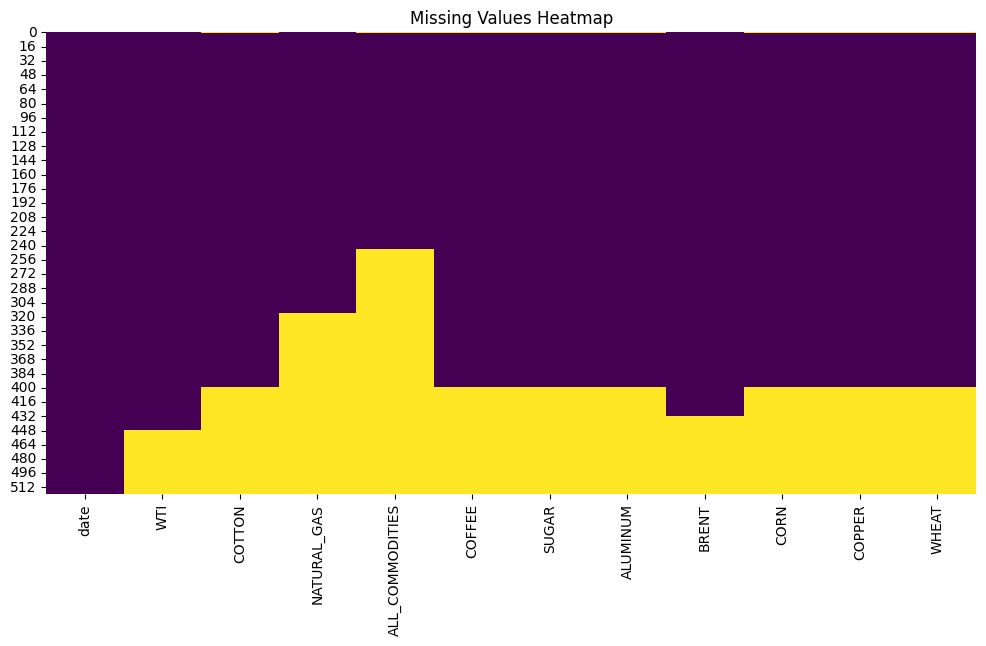

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Check for missing values again
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 WTI                 72
COTTON             121
NATURAL_GAS        204
ALL_COMMODITIES    277
COFFEE             121
SUGAR              121
ALUMINUM           121
BRENT               88
CORN               121
COPPER             121
WHEAT              121
dtype: int64


In [9]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Alternatively, fill with the median (Optional)
# df.fillna(df.median(), inplace=True)

# Check if there are any missing values left
print("Missing values after filling:\n", df.isnull().sum())


Missing values after filling:
 date               0
WTI                0
COTTON             0
NATURAL_GAS        0
ALL_COMMODITIES    0
COFFEE             0
SUGAR              0
ALUMINUM           0
BRENT              0
CORN               0
COPPER             0
WHEAT              0
dtype: int64


In [10]:
# Lets now Display the cleaned dataframe's summary statistics
print(df.describe())


                                date         WTI      COTTON  NATURAL_GAS  \
count                            520  520.000000  520.000000   520.000000   
mean   2001-08-16 05:10:09.230769280   46.330848   77.229527     4.235949   
min              1980-01-01 00:00:00   11.350000   37.221739     1.630000   
25%              1990-10-24 06:00:00   20.827500   64.182386     3.107500   
50%              2001-08-16 12:00:00   46.330848   77.229527     4.235949   
75%              2012-06-08 12:00:00   62.277500   82.874996     4.235949   
max              2023-04-01 00:00:00  133.880000  229.667391    13.420000   
std                              NaN   27.397154   22.157517     1.684644   

       ALL_COMMODITIES      COFFEE       SUGAR     ALUMINUM       BRENT  \
count       520.000000  520.000000  520.000000   520.000000  520.000000   
mean        132.493239  136.677453   13.137825  1811.703660   48.902245   
min          61.887199   50.830000    5.111200  1040.022705    9.820000   
25%   

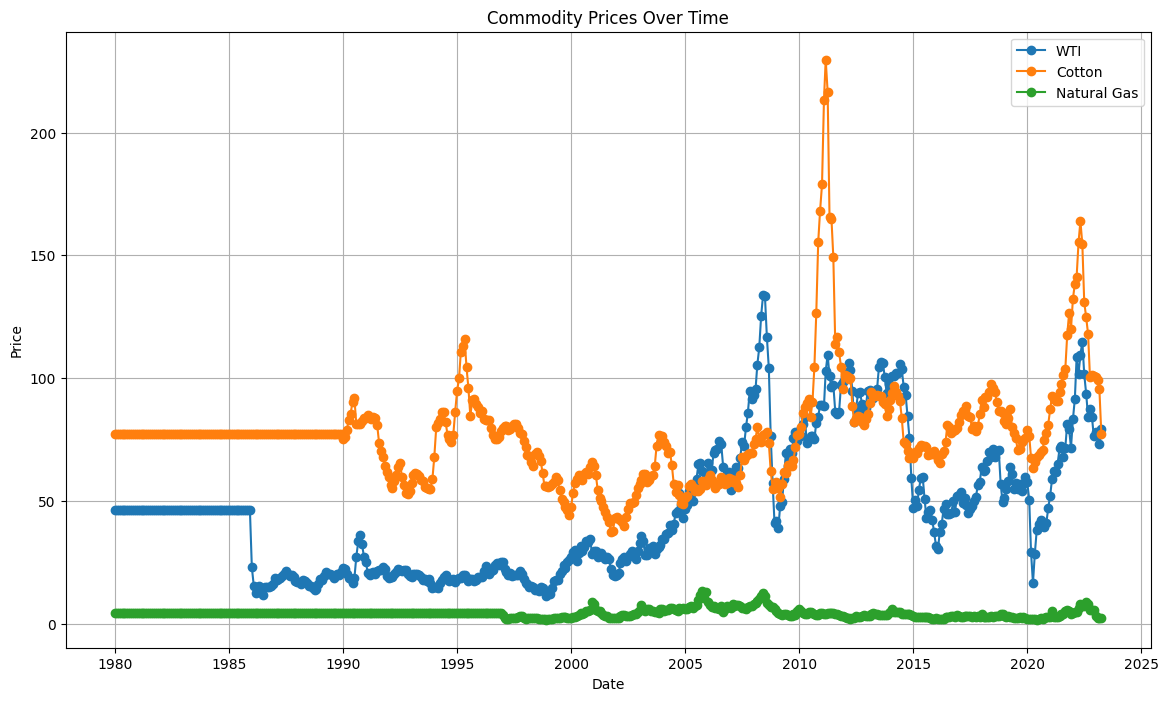

In [11]:
# Set the date column as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot selected commodities over time
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['WTI'], label='WTI', marker='o')
plt.plot(df.index, df['COTTON'], label='Cotton', marker='o')
plt.plot(df.index, df['NATURAL_GAS'], label='Natural Gas', marker='o')
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

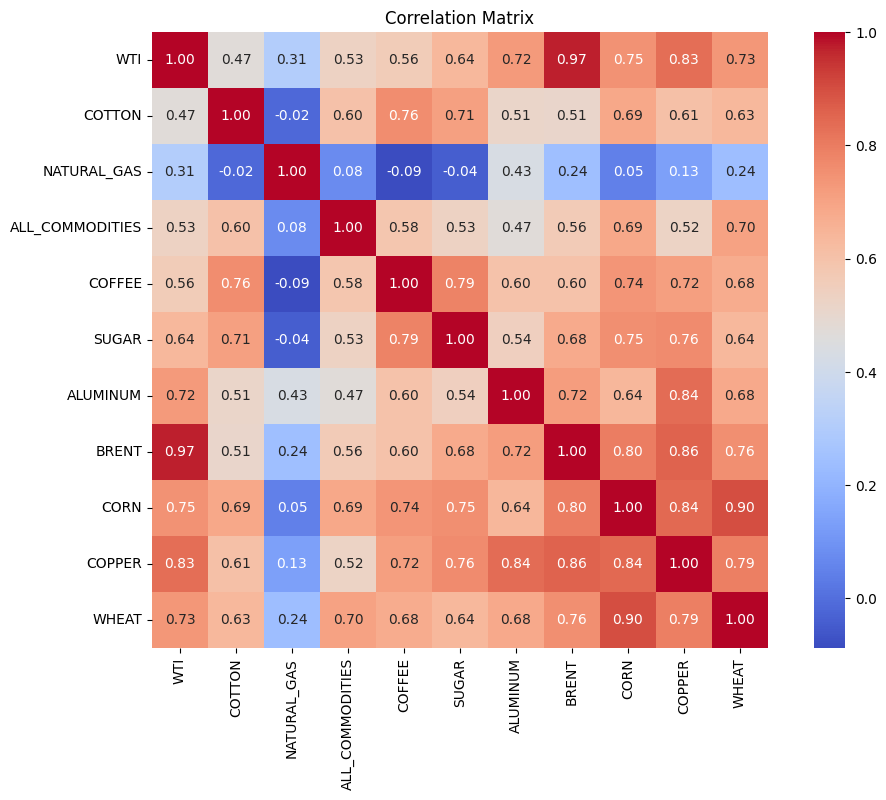

In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


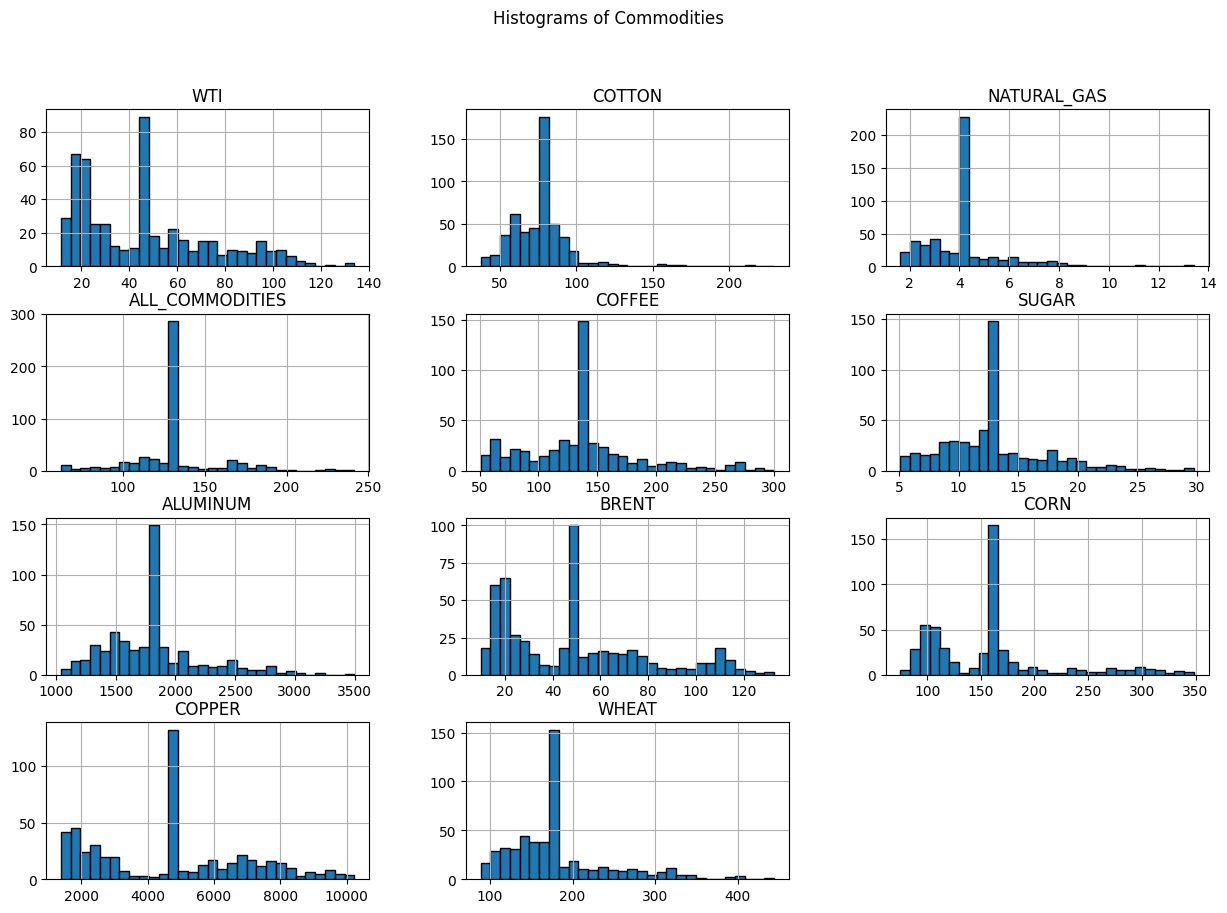

In [13]:
# Plot histograms for each commodity
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Commodities')
plt.show()


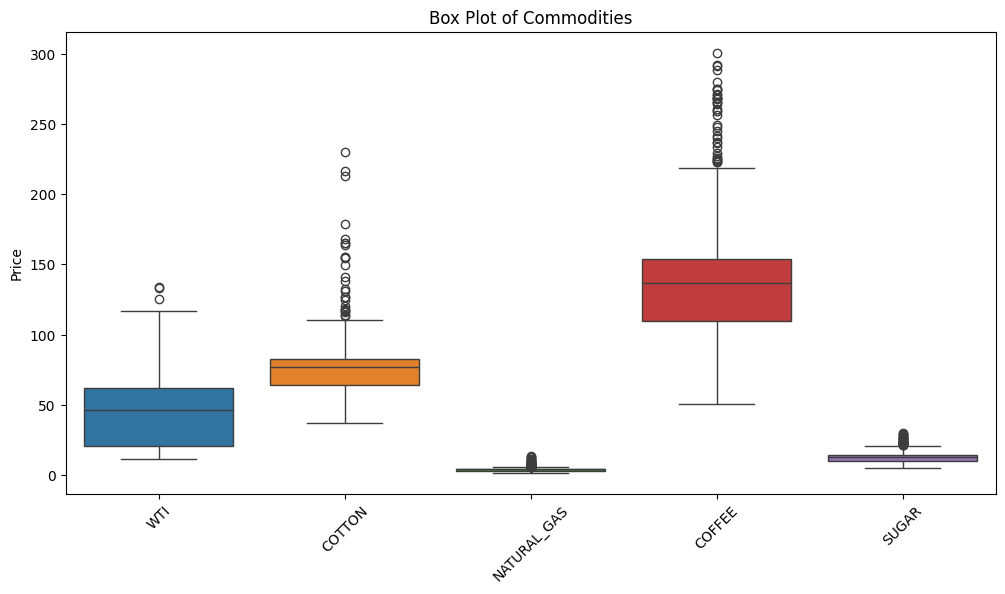

In [14]:
# Box plot for selected commodities
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['WTI', 'COTTON', 'NATURAL_GAS', 'COFFEE', 'SUGAR']])
plt.title('Box Plot of Commodities')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('../data/processed_data.csv', index=False)
